In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Pour afficher les graphiques directement dans le notebook
%matplotlib inline

# Importation des données
df = pd.read_csv("C:/Users/sofia/OneDrive/Documents/GitHub/P_DM_UE3//data/combined_data.csv")
df.head()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416.0,418.62,421.24,...,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,class
0,0.160989,0.152837,0.143099,0.132230,0.121732,0.113088,0.106684,0.102206,0.097464,0.094226,...,0.268508,0.268674,0.268942,0.269235,0.269651,0.270141,0.270695,0.271260,0.271902,canola
1,0.157316,0.148315,0.139275,0.129330,0.120090,0.112003,0.105155,0.100885,0.097040,0.093725,...,0.277404,0.277630,0.277895,0.278252,0.278681,0.279293,0.279852,0.280512,0.281131,canola
2,0.180705,0.171157,0.159826,0.147212,0.136382,0.126773,0.119723,0.115086,0.109832,0.105594,...,0.304266,0.304477,0.304762,0.305169,0.305732,0.306397,0.307044,0.307668,0.308387,canola
3,0.159618,0.151638,0.141948,0.131743,0.121592,0.112819,0.106271,0.101794,0.097496,0.094452,...,0.270041,0.270336,0.270555,0.270984,0.271544,0.272093,0.272727,0.273407,0.274073,canola
4,0.147031,0.139998,0.130906,0.121395,0.112400,0.104592,0.098618,0.095303,0.091420,0.088122,...,0.247827,0.248123,0.248419,0.248833,0.249397,0.249951,0.250570,0.251253,0.251939,canola


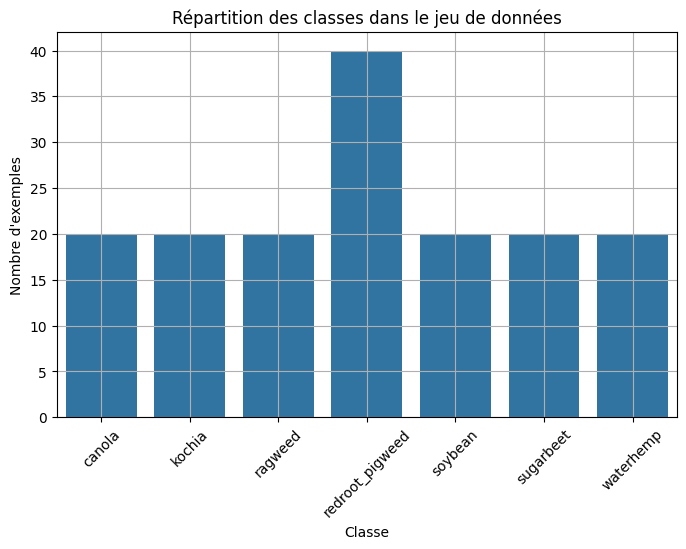

In [6]:

y = df['class']

# Visualisation corrigée
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title("Répartition des classes dans le jeu de données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
## Oversampling pour équilibrer le jeu de données

# Extraire la classe majoritaire
majority_class = df[df['class'] == 'redroot_pigweed']

# Extraire toutes les classes minoritaires
minority_classes = df[df['class'] != 'redroot_pigweed']

# Appliquer un oversampling pour chaque classe minoritaire
balanced_minority_list = []
for label in minority_classes['class'].unique():
    subset = minority_classes[minority_classes['class'] == label]
    upsampled = resample(subset, replace=True, n_samples=40, random_state=42)
    balanced_minority_list.append(upsampled)

# Fusionner toutes les classes
df_balanced = pd.concat([majority_class] + balanced_minority_list)


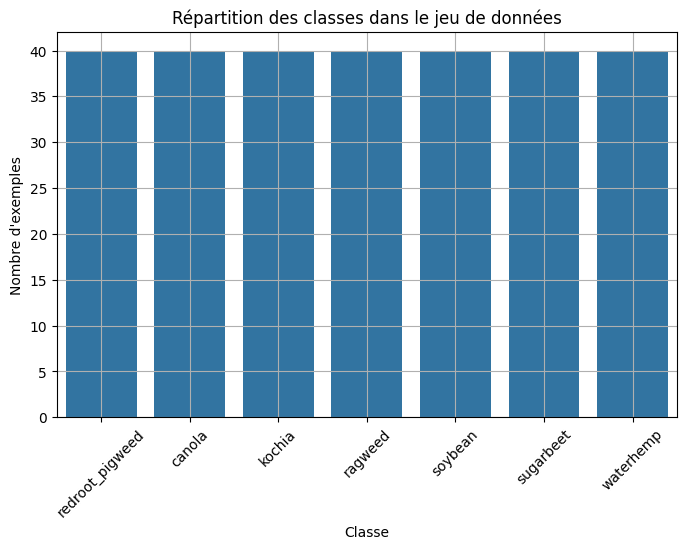

In [10]:
y = df_balanced['class']

# Visualisation corrigée
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title("Répartition des classes dans le jeu de données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


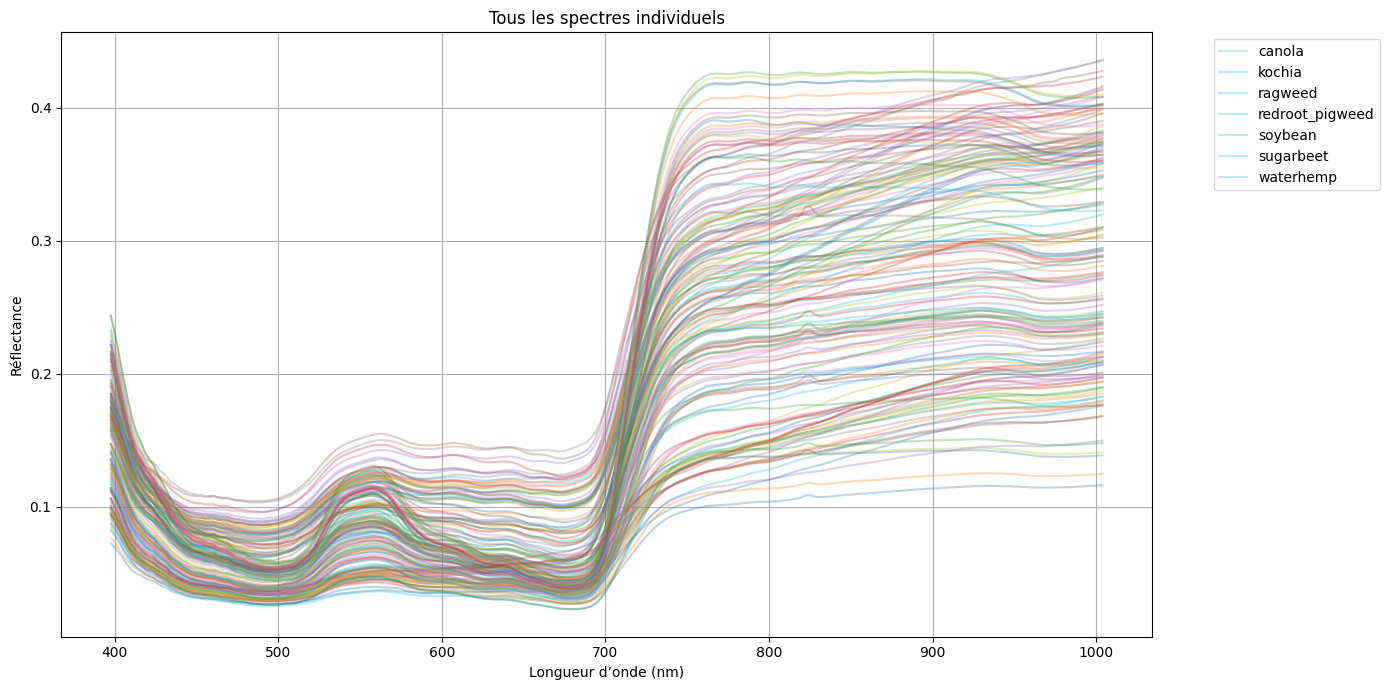

In [11]:
## Visualisation des données brutes

# X = colonnes spectrales (toutes sauf 'class')
X = df.drop(columns=["class"])

# y = étiquettes (noms de plantes)
y = df["class"]

# Conversion des longueurs d'onde en float pour les tracer
wavelengths = X.columns.astype(float)



plt.figure(figsize=(14, 7))

# Pour chaque échantillon, tracer son spectre avec une couleur correspondant à sa classe
for i in range(len(X)):
    plt.plot(wavelengths, X.iloc[i], alpha=0.3, label=y.iloc[i])

# Pour éviter les milliers de doublons dans la légende, on affiche une seule fois chaque classe
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Tous les spectres individuels")
plt.xlabel("Longueur d’onde (nm)")
plt.ylabel("Réflectance")
plt.grid(True)
plt.tight_layout()
plt.show()




In [13]:
## Création du modèle simple avec les données brutes

# 📦 Imports nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 🎯 Séparation des variables explicatives (X) et de la cible (y)
X = df_balanced.drop(columns=['class'])
y = df_balanced['class']

# 🔠 Encodage des classes en valeurs numériques
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✂️ Séparation en 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 🌲 Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔍 Prédictions sur le jeu de test
y_pred = rf_model.predict(X_test)

# 📊 Évaluation du modèle
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("\n📄 Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("🧮 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy : 0.9821428571428571

📄 Rapport de classification :
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         8
         kochia       1.00      1.00      1.00         8
        ragweed       1.00      0.88      0.93         8
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         8
      sugarbeet       1.00      1.00      1.00         8
      waterhemp       0.89      1.00      0.94         8

       accuracy                           0.98        56
      macro avg       0.98      0.98      0.98        56
   weighted avg       0.98      0.98      0.98        56

🧮 Matrice de confusion :
[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 7 0 0 0 1]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 8]]


In [15]:
## Prétraitement SNV

import pandas as pd
import numpy as np

# On suppose que df_balanced est déjà défini
# Séparer X et y
X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]

# 🧼 Appliquer le prétraitement SNV (ligne par ligne)
def snv_transform(X_df):
    # Soustraction de la moyenne et division par l'écart-type pour chaque ligne
    X_snv = (X_df - X_df.mean(axis=1).values.reshape(-1, 1)) / X_df.std(axis=1).values.reshape(-1, 1)
    return X_snv

X_snv = snv_transform(X)

# Fusionner avec y pour avoir un DataFrame final SNV + classe
df_snv = X_snv.copy()
df_snv["class"] = y



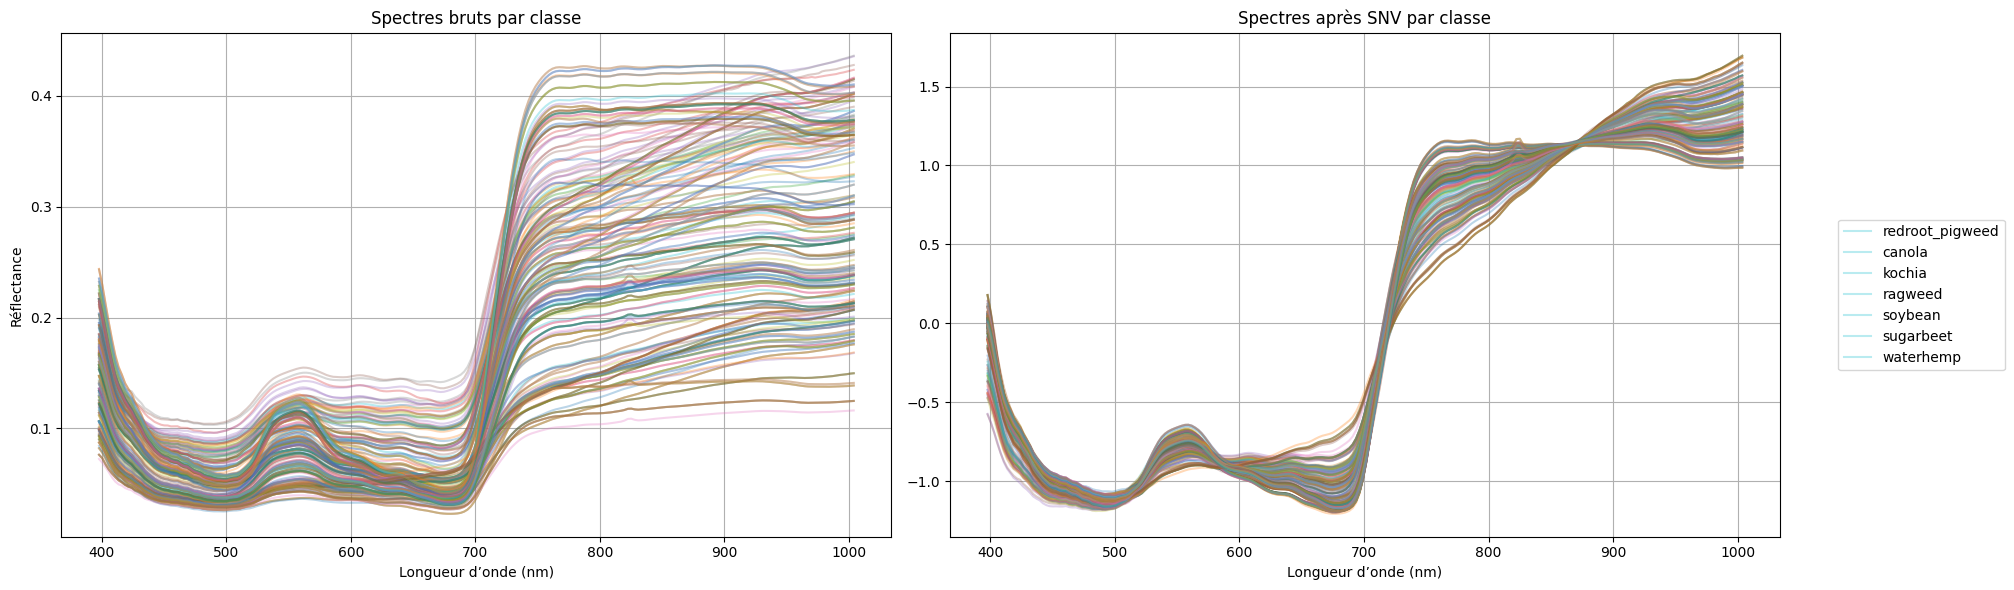

In [21]:
# Visualisation du SNV
import matplotlib.pyplot as plt

# ➤ Séparer X et y
X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]

# ➤ Calcul des longueurs d’onde
wavelengths = X.columns.astype(float)

# ➤ Appliquer le SNV
def snv_transform(X_df):
    return (X_df - X_df.mean(axis=1).values.reshape(-1, 1)) / X_df.std(axis=1).values.reshape(-1, 1)

X_snv = snv_transform(X)

# ➤ Création des subplots côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# --- 🔹 Graphe 1 : Spectres bruts
for i in range(len(X)):
    axes[0].plot(wavelengths, X.iloc[i], alpha=0.3, label=y.iloc[i])
axes[0].set_title("Spectres bruts par classe")
axes[0].set_xlabel("Longueur d’onde (nm)")
axes[0].set_ylabel("Réflectance")
axes[0].grid(True)

# --- 🔸 Graphe 2 : Spectres après SNV
for i in range(len(X_snv)):
    axes[1].plot(wavelengths, X_snv.iloc[i], alpha=0.3, label=y.iloc[i])
axes[1].set_title("Spectres après SNV par classe")
axes[1].set_xlabel("Longueur d’onde (nm)")
axes[1].grid(True)

# ➤ Affichage unique de la légende à droite
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()






In [22]:
# === Entraînement Random Forest sur données SNV ===

# Prétraitement SNV
def snv_transform(X_df):
    return (X_df - X_df.mean(axis=1).values.reshape(-1, 1)) / X_df.std(axis=1).values.reshape(-1, 1)

X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]

X_snv = snv_transform(X)

# Encodage des classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split 80/20 avec stratification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_snv, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model_snv = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_snv.fit(X_train, y_train)

# Prédictions
y_pred = rf_model_snv.predict(X_test)

# Évaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Accuracy (SNV) :", accuracy_score(y_test, y_pred))
print("\n📄 Rapport de classification (SNV) :")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("🧮 Matrice de confusion (SNV) :")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy (SNV) : 0.9821428571428571

📄 Rapport de classification (SNV) :
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         8
         kochia       0.89      1.00      0.94         8
        ragweed       1.00      0.88      0.93         8
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         8
      sugarbeet       1.00      1.00      1.00         8
      waterhemp       1.00      1.00      1.00         8

       accuracy                           0.98        56
      macro avg       0.98      0.98      0.98        56
   weighted avg       0.98      0.98      0.98        56

🧮 Matrice de confusion (SNV) :
[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 1 7 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 8]]


In [ ]:
## Prétraitement Savitzky-Golay (lissage)

from scipy.signal import savgol_filter

# ➤ Séparation X (spectres) et y (classe)
X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]

# ➤ Paramètres du filtre de lissage Savitzky-Golay
window_length = 11  # (doit être impair et < nb de colonnes)
polyorder = 2       # Ordre du polynôme pour le lissage
deriv = 0           # 0 = lissage simple

# ➤ Application du filtre à chaque ligne
X_savgol = X.apply(
    lambda row: savgol_filter(row, window_length=window_length, polyorder=polyorder, deriv=deriv),
    axis=1, result_type='expand'
)

# ➤ Récupérer les noms de colonnes d’origine
X_savgol.columns = X.columns

# ➤ Réassembler avec la classe
df_savgol = X_savgol.copy()
df_savgol["class"] = y


,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416.0,418.62,421.24,...,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,class
60,0.159637,0.149866,0.140992,0.133014,0.125934,0.119750,0.114294,0.109999,0.106863,0.104213,...,0.353956,0.354687,0.355425,0.356201,0.356965,0.357740,0.358525,0.359322,0.360129,redroot_pigweed
61,0.173156,0.162070,0.151940,0.142766,0.134547,0.127283,0.120579,0.115231,0.111187,0.107926,...,0.344515,0.345105,0.345717,0.346346,0.347013,0.347708,0.348432,0.349185,0.349966,redroot_pigweed
62,0.167149,0.156128,0.146139,0.137181,0.129255,0.122361,0.116439,0.111764,0.108048,0.105024,...,0.271669,0.272006,0.272365,0.272733,0.273134,0.273555,0.273996,0.274455,0.274934,redroot_pigweed
63,0.173480,0.161820,0.151229,0.141706,0.133252,0.125866,0.119487,0.114347,0.110373,0.107092,...,0.272863,0.273212,0.273618,0.274049,0.274483,0.274941,0.275421,0.275924,0.276450,redroot_pigweed
64,0.180914,0.170556,0.161060,0.152424,0.144650,0.137736,0.131282,0.126082,0.122074,0.118981,...,0.402830,0.403528,0.404247,0.405006,0.405733,0.406465,0.407201,0.407942,0.408687,redroot_pigweed


C:\Users\sofia\AppData\Local\Temp\ipykernel_20024\733623781.py:39: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sofia\AppData\Local\Temp\ipykernel_20024\733623781.py:39: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


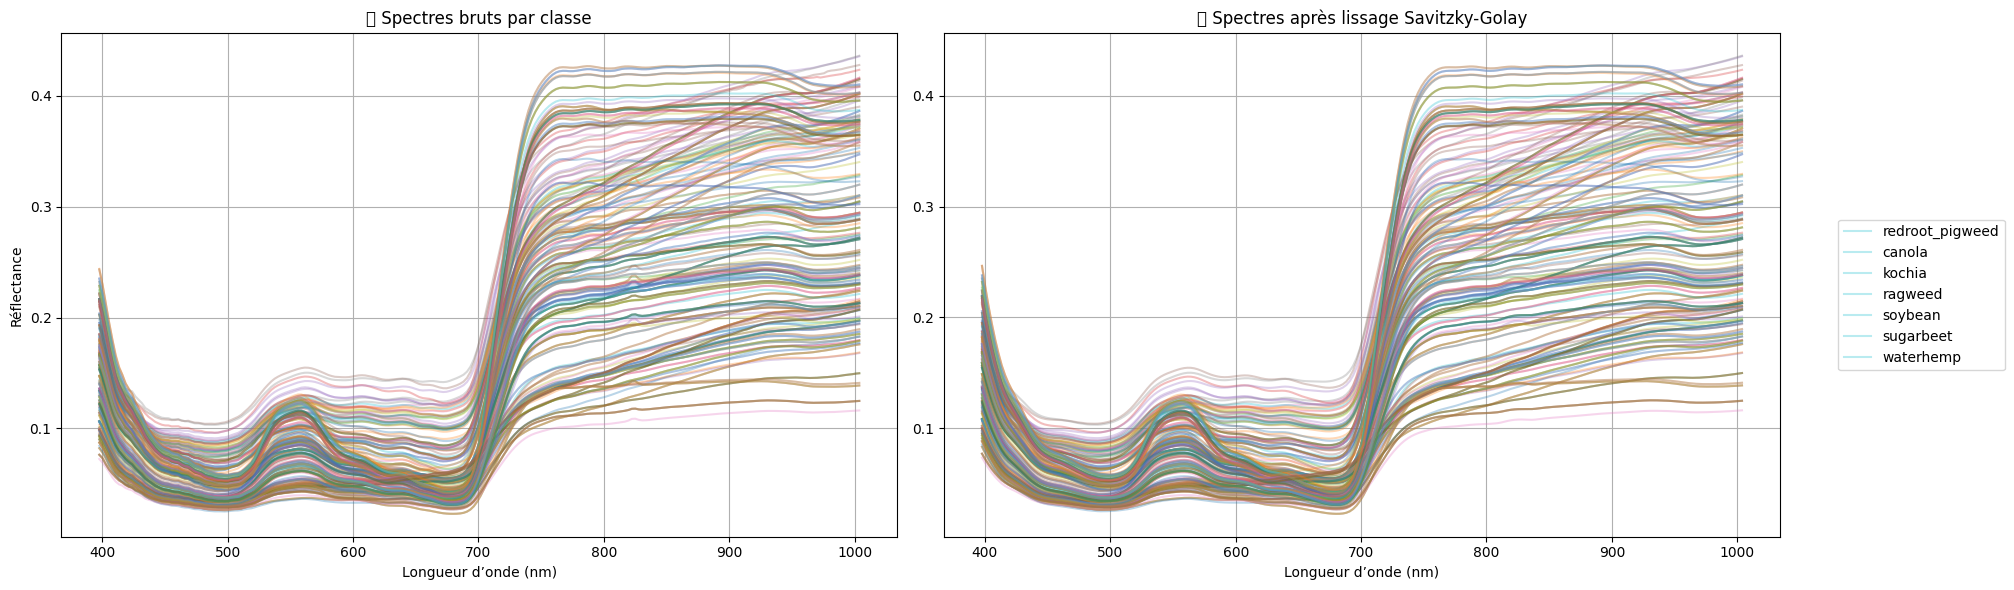

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# ➤ Séparer X et y
X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]
wavelengths = X.columns.astype(float)

# ➤ Appliquer Savitzky-Golay (lissage uniquement)
X_savgol = X.apply(
    lambda row: savgol_filter(row, window_length=11, polyorder=2, deriv=0),
    axis=1, result_type='expand'
)
X_savgol.columns = X.columns

# ➤ Tracer les deux versions côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# --- 🔹 Graphe 1 : Spectres bruts
for i in range(len(X)):
    axes[0].plot(wavelengths, X.iloc[i], alpha=0.3, label=y.iloc[i])
axes[0].set_title("Spectres bruts par classe")
axes[0].set_xlabel("Longueur d’onde (nm)")
axes[0].set_ylabel("Réflectance")
axes[0].grid(True)

# --- 🔸 Graphe 2 : Spectres lissés (Savitzky-Golay)
for i in range(len(X_savgol)):
    axes[1].plot(wavelengths, X_savgol.iloc[i], alpha=0.3, label=y.iloc[i])
axes[1].set_title("Spectres après lissage Savitzky-Golay")
axes[1].set_xlabel("Longueur d’onde (nm)")
axes[1].grid(True)

# ➤ Légende commune à droite
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_20024\3145374657.py:45: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sofia\AppData\Local\Temp\ipykernel_20024\3145374657.py:45: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


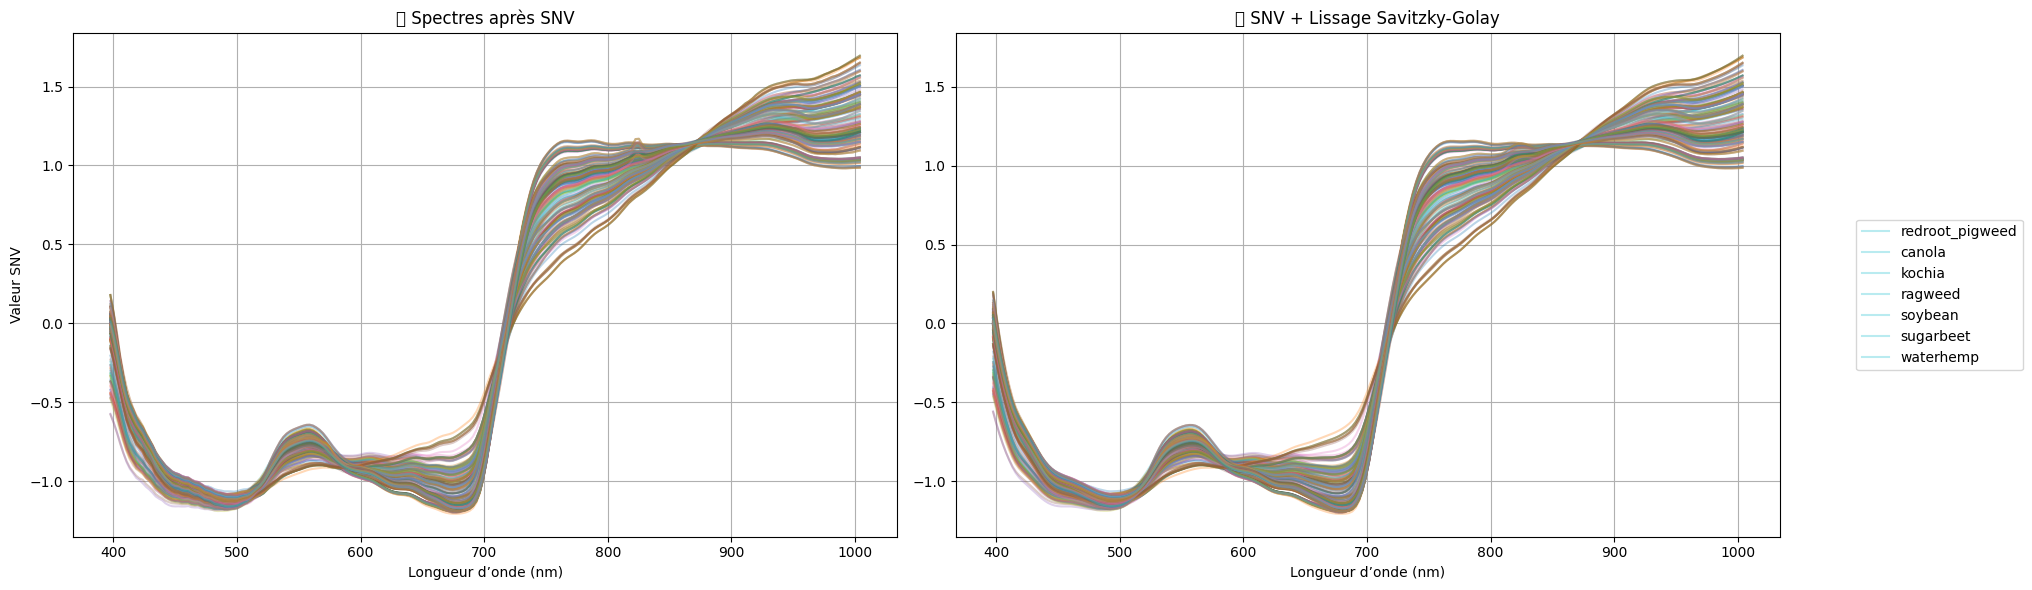

In [26]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# ➤ Données de base
X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]
wavelengths = X.columns.astype(float)

# ➤ SNV
def snv_transform(X_df):
    return (X_df - X_df.mean(axis=1).values.reshape(-1, 1)) / X_df.std(axis=1).values.reshape(-1, 1)

X_snv = snv_transform(X)

# ➤ SNV + Savitzky-Golay
X_snv_golay = X_snv.apply(
    lambda row: savgol_filter(row, window_length=11, polyorder=2, deriv=0),
    axis=1, result_type='expand'
)
X_snv_golay.columns = X.columns

# ➤ Création du graphe comparatif
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# --- SNV seul
for i in range(len(X_snv)):
    axes[0].plot(wavelengths, X_snv.iloc[i], alpha=0.3, label=y.iloc[i])
axes[0].set_title("🔹 Spectres après SNV")
axes[0].set_xlabel("Longueur d’onde (nm)")
axes[0].set_ylabel("Valeur SNV")
axes[0].grid(True)

# --- SNV + lissage Golay
for i in range(len(X_snv_golay)):
    axes[1].plot(wavelengths, X_snv_golay.iloc[i], alpha=0.3, label=y.iloc[i])
axes[1].set_title("🔸 SNV + Lissage Savitzky-Golay")
axes[1].set_xlabel("Longueur d’onde (nm)")
axes[1].grid(True)

# ➤ Légende commune
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.03, 0.5), loc='center left')

plt.tight_layout()
plt.show()


In [28]:
## Test du modèle avec les données lissage Golay puis SNV+ lissage Golay

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np

# Séparation X / y
X = df_balanced.drop(columns=["class"])
y = df_balanced["class"]

# Encodage des classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 1. Lissage Savitzky-Golay seul ===
X_golay = X.apply(
    lambda row: savgol_filter(row, window_length=11, polyorder=2, deriv=0),
    axis=1, result_type='expand'
)
X_golay.columns = X.columns

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_golay, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)
y_pred1 = rf1.predict(X_test1)

print("🎯 Modèle avec Savitzky-Golay seul")
print("Accuracy :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1, target_names=le.classes_))

# === 2. SNV + Savitzky-Golay ===
def snv_transform(X_df):
    return (X_df - X_df.mean(axis=1).values.reshape(-1, 1)) / X_df.std(axis=1).values.reshape(-1, 1)

X_snv = snv_transform(X)
X_snv_golay = X_snv.apply(
    lambda row: savgol_filter(row, window_length=11, polyorder=2, deriv=0),
    axis=1, result_type='expand'
)
X_snv_golay.columns = X.columns

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_snv_golay, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)
y_pred2 = rf2.predict(X_test2)

print("\n⚗️ Modèle avec SNV + Savitzky-Golay")
print("Accuracy :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2, target_names=le.classes_))


🎯 Modèle avec Savitzky-Golay seul
Accuracy : 0.9821428571428571
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         8
         kochia       1.00      1.00      1.00         8
        ragweed       1.00      0.88      0.93         8
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         8
      sugarbeet       1.00      1.00      1.00         8
      waterhemp       0.89      1.00      0.94         8

       accuracy                           0.98        56
      macro avg       0.98      0.98      0.98        56
   weighted avg       0.98      0.98      0.98        56


⚗️ Modèle avec SNV + Savitzky-Golay
Accuracy : 0.9821428571428571
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         8
         kochia       0.89      1.00      0.94         8
        ragweed       1.00      0.88      0.93         8
redroot_pi

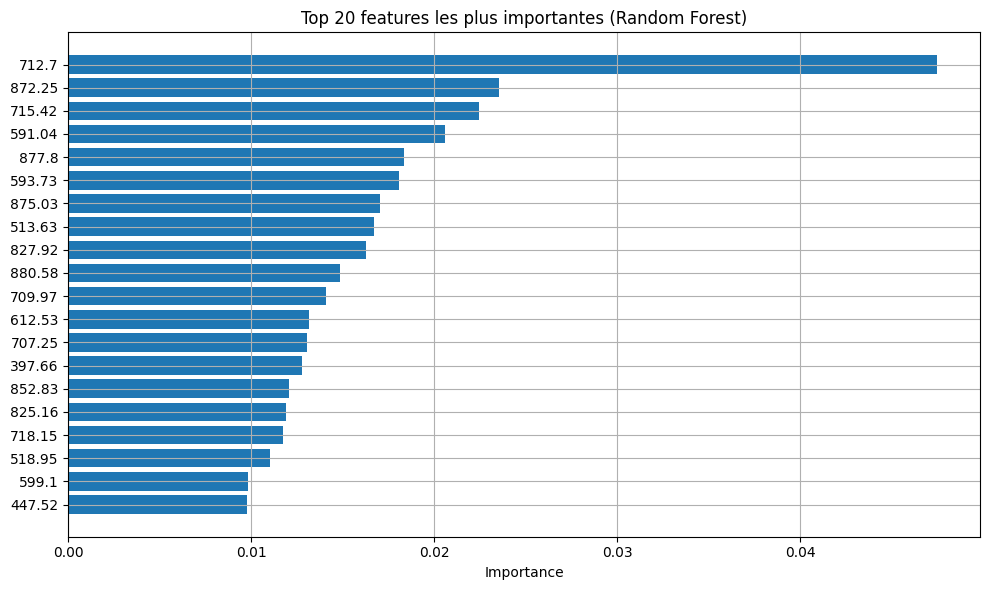

🧮 Dimension initiale : 224
🔻 Dimension après réduction : 18


In [29]:
## Ajustement des features et réduction de dimensions

import pandas as pd
import matplotlib.pyplot as plt

# 1. Extraire les importances
importances = rf_model_snv.feature_importances_
feature_names = X_snv.columns.astype(str)

# 2. Créer un DataFrame trié par importance
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Afficher les 20 features les plus importantes
top_n = 20
top_features = feat_importance_df.head(top_n)

# 4. Graphe
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importance")
plt.title(f"Top {top_n} features les plus importantes (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Réduction de dimension : seuil d'importance
threshold = 0.01
important_features = feat_importance_df[feat_importance_df['Importance'] > threshold]['Feature'].values

# 6. Jeu de données réduit
X_snv_reduced = X_snv[important_features]

# 7. Affichage des dimensions
print("🧮 Dimension initiale :", X_snv.shape[1])
print("🔻 Dimension après réduction :", X_snv_reduced.shape[1])


In [30]:
## Part de la variabilité expliquée par les features restantes

# 1. Total de l'importance (normalement = 1.0)
importance_totale = feat_importance_df['Importance'].sum()

# 2. Importance cumulée des features retenues
importance_reduite = feat_importance_df[feat_importance_df['Feature'].isin(important_features)]['Importance'].sum()

# 3. Proportion expliquée par les 18 features
part_expliquee = importance_reduite / importance_totale

print(f"📈 Part de l'importance expliquée par les {len(important_features)} features retenues : {part_expliquee:.2%}")


📈 Part de l'importance expliquée par les 18 features retenues : 31.50%


In [31]:
## Nouveau modèle avec les meilleures features

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Reprendre les features importantes (si ce n’est pas déjà fait)
X_snv_reduced = X_snv[important_features]

# 2. Recréer le train/test split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_snv_reduced, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Entraîner un nouveau modèle Random Forest
rf_model_reduit = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_reduit.fit(X_train_red, y_train_red)

# 4. Prédictions
y_pred_red = rf_model_reduit.predict(X_test_red)

# 5. Évaluation
print("✅ Accuracy (modèle réduit) :", accuracy_score(y_test_red, y_pred_red))
print("\n📄 Rapport de classification (modèle réduit) :")
print(classification_report(y_test_red, y_pred_red, target_names=le.classes_))

print("🧮 Matrice de confusion :")
print(confusion_matrix(y_test_red, y_pred_red))


✅ Accuracy (modèle réduit) : 0.9821428571428571

📄 Rapport de classification (modèle réduit) :
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         8
         kochia       0.89      1.00      0.94         8
        ragweed       1.00      0.88      0.93         8
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         8
      sugarbeet       1.00      1.00      1.00         8
      waterhemp       1.00      1.00      1.00         8

       accuracy                           0.98        56
      macro avg       0.98      0.98      0.98        56
   weighted avg       0.98      0.98      0.98        56

🧮 Matrice de confusion :
[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 1 7 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 8]]


In [32]:
## Optimisation des hyperparamètres

from sklearn.model_selection import GridSearchCV

# 1. Définir le modèle de base
rf_base = RandomForestClassifier(random_state=42)

# 2. Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. GridSearch avec validation croisée 5-fold
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 4. Lancer le grid search sur les données réduites
grid_search.fit(X_train_red, y_train_red)

# 5. Afficher les meilleurs paramètres et score
print("🌟 Meilleurs hyperparamètres :", grid_search.best_params_)
print("🎯 Meilleure accuracy (cross-validation) :", grid_search.best_score_)

# 6. Réévaluer sur le test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_red)

print("\n📈 Accuracy sur test set :", accuracy_score(y_test_red, y_pred_best))
print("\n📄 Rapport de classification :")
print(classification_report(y_test_red, y_pred_best, target_names=le.classes_))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
🌟 Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
🎯 Meilleure accuracy (cross-validation) : 0.9911111111111112

📈 Accuracy sur test set : 0.9821428571428571

📄 Rapport de classification :
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         8
         kochia       0.89      1.00      0.94         8
        ragweed       1.00      0.88      0.93         8
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         8
      sugarbeet       1.00      1.00      1.00         8
      waterhemp       1.00      1.00      1.00         8

       accuracy                           0.98        56
      macro avg       0.98      0.98      0.98        56
   weighted avg       0.98      0.98      0.98        56



c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


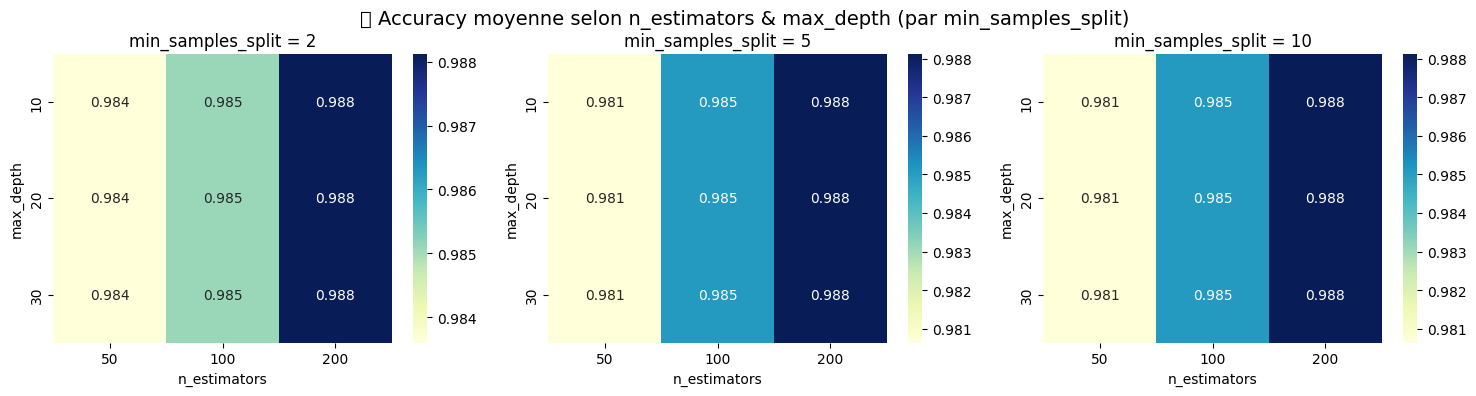

In [ ]:
## (Optionnel)

import seaborn as sns
import matplotlib.pyplot as plt

# Liste des valeurs uniques de min_samples_split
split_vals = sorted(results_df['param_min_samples_split'].unique())

# Taille de la grille (ajuster si plus ou moins de splits)
n_cols = 3
n_rows = -(-len(split_vals) // n_cols)  # équivalent de ceil()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot une heatmap pour chaque min_samples_split
for i, split_val in enumerate(split_vals):
    ax = axes[i]
    data_subset = results_df[results_df['param_min_samples_split'] == split_val]
    pivot_table = data_subset.pivot_table(
        index='param_max_depth',
        columns='param_n_estimators',
        values='mean_test_score'
    )
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax)
    ax.set_title(f"min_samples_split = {split_val}")
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("max_depth")

# Supprimer les axes inutiles si le nombre n’est pas exact
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("🌐 Accuracy moyenne selon n_estimators & max_depth (par min_samples_split)", fontsize=14)
plt.show()



In [37]:
## Robustesse du modèle

from sklearn.model_selection import cross_val_score
import numpy as np

# Validation croisée 5-fold sur le modèle optimisé
cv_scores = cross_val_score(
    best_model, X_snv_reduced, y_encoded,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Résultats
print("📊 Scores de validation croisée (5-fold) :", cv_scores)
print(f"✅ Moyenne : {cv_scores.mean():.4f}")
print(f"📉 Écart-type : {cv_scores.std():.4f}")


📊 Scores de validation croisée (5-fold) : [1.         1.         0.98214286 1.         1.        ]
✅ Moyenne : 0.9964
📉 Écart-type : 0.0071


C:\Users\sofia\AppData\Local\Temp\ipykernel_20024\61280159.py:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


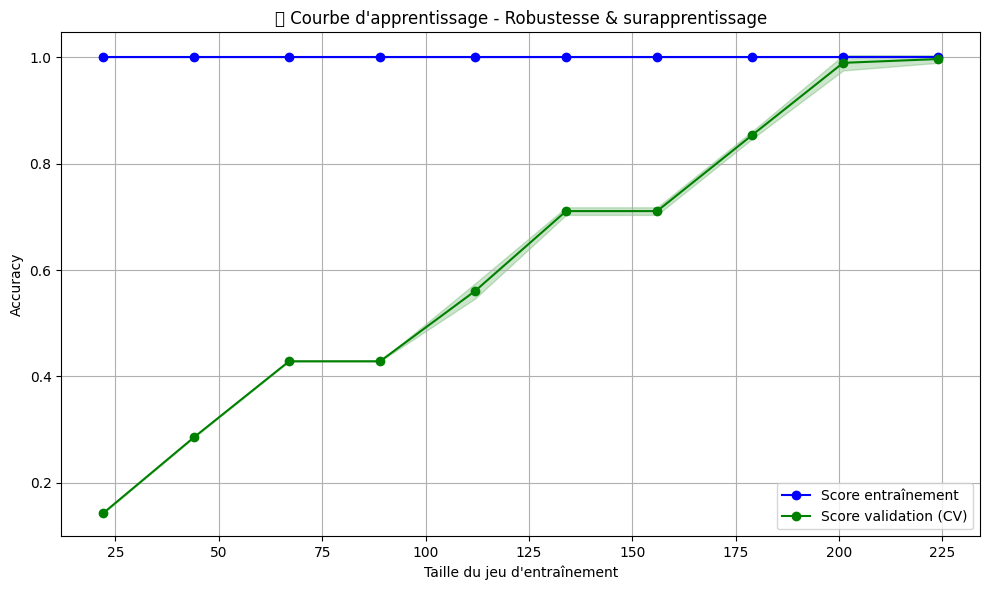

In [38]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Générer les courbes d’apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_snv_reduced,
    y=y_encoded,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

# Moyennes et écarts-types
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score validation (CV)')

# Zones d’incertitude
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')

# Mise en forme
plt.title("📈 Courbe d'apprentissage - Robustesse & surapprentissage")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_20024\1032658853.py:18: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


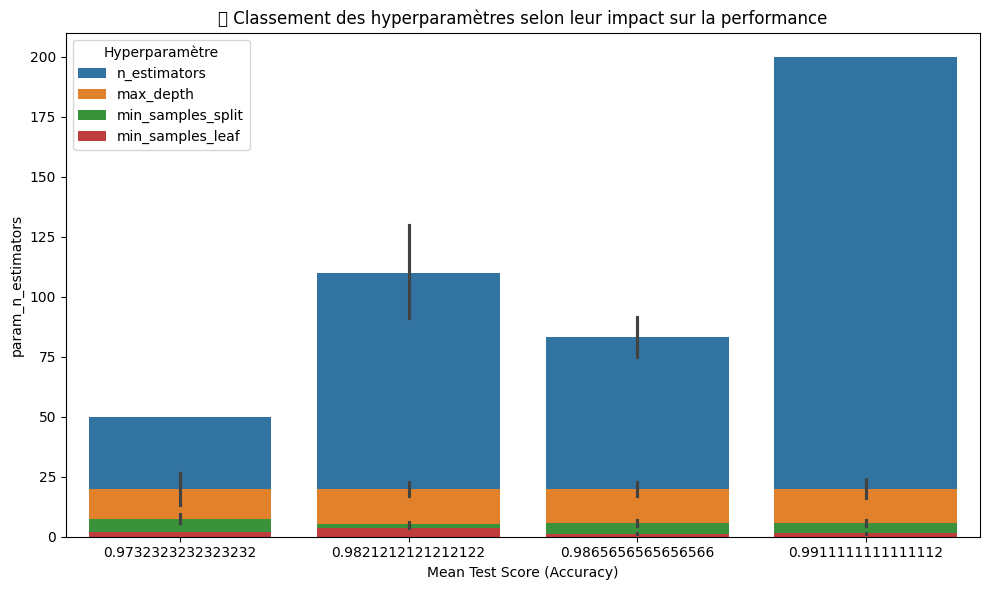

In [39]:
# Extraire les résultats de GridSearchCV dans un DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Trier les hyperparamètres par leur score moyen
sorted_results = results_df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                             'param_min_samples_leaf', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Plot : classement des hyperparamètres par importance de leur score
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_test_score', y='param_n_estimators', data=sorted_results, label="n_estimators")
sns.barplot(x='mean_test_score', y='param_max_depth', data=sorted_results, label="max_depth")
sns.barplot(x='mean_test_score', y='param_min_samples_split', data=sorted_results, label="min_samples_split")
sns.barplot(x='mean_test_score', y='param_min_samples_leaf', data=sorted_results, label="min_samples_leaf")

plt.xlabel('Mean Test Score (Accuracy)')
plt.title("🏆 Classement des hyperparamètres selon leur impact sur la performance")
plt.legend(title="Hyperparamètre")
plt.tight_layout()
plt.show()
